In [1]:
# Installs required pip packages in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install matplotlib



You should consider upgrading via the '/home/ubuntu/catherine_work/Drawdown/jupyterenv/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ubuntu/catherine_work/Drawdown/jupyterenv/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ubuntu/catherine_work/Drawdown/jupyterenv/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy as np


In [3]:
#import and check the Exponential integral function (also known as Theis well function)
from scipy.special import expi
u = 4 * 10** -np.arange(11.)   # generates values 4, 4e-1, 4e-2 .. 4e-10
print("{:>10s}   {:>10s}".format('u   ', 'wu   '))
for u, wu in zip(u, -expi(-u)):  # makes a list of value pairs [u, W(u)]
    print("{0:10.1e}   {1:10.4e}".format(u, wu))

      u           wu   
   4.0e+00   3.7794e-03
   4.0e-01   7.0238e-01
   4.0e-02   2.6813e+00
   4.0e-03   4.9482e+00
   4.0e-04   7.2472e+00
   4.0e-05   9.5495e+00
   4.0e-06   1.1852e+01
   4.0e-07   1.4155e+01
   4.0e-08   1.6457e+01
   4.0e-09   1.8760e+01
   4.0e-10   2.1062e+01


In [4]:
#define W as anonymous (lambda) function
from scipy.special import expi
W = lambda u : -expi(-u)

In [5]:
#define W as regular function
def W(u): return -expi(-u)

In [6]:
#define W as Theis Well function in scipy

import scipy
W = lambda u: -scipy.special.expi( -u ) 

In [18]:
"""
For example: what is the drawdown after 
𝑡=1𝑑 at distance 𝑟=100 ft 
by a well extracting 𝑄=2400𝑚3/𝑑 
in a confined aquifer with 
transmissivity 𝑘𝐷=2400𝑚2/𝑑 and 
storage coefficient 𝑆=0.001 [-] ?

radius	r	100	ft

Storativity	S	0.07809	dimensionless

Transmissivity	kD	0.000172	ft2/s

time	t	86400	seconds

drawdown	h0-h	3	ft, bgs


flow rate	Q	0.009	ft3/2

"""

r = 100; t = 1.; kD=0.000172; S=0.07809; Q=0.009
u = r**2 * S / (4 * kD * t)

s = Q/(4 * np.pi * kD) * W(u)  # applying the theis well function according to the book

print("    r = {} ft\n\
    t = {} s\n\
    kD = {} ft2/s\n\
    S = {} [-]\n\
    Q = {} ft3/s\n\
    u = {:.5g} [-]\n\
    W(u) = {:.5g} [-]\n\
    s(r, t) = {:.5g} ft".
      format(r, t, kD, S, Q, u, W(u), s))

    r = 100 ft
    t = 1.0 s
    kD = 0.000172 ft2/s
    S = 0.07809 [-]
    Q = 0.009 ft3/s
    u = 1.135e+06 [-]
    W(u) = 0 [-]
    s(r, t) = 0 ft


In [19]:
#define a lambda function for u
u = lambda r, t: r**2 *S /(4.* kD * t)

In [20]:
u(r,t)  # yields u as a function of r and t

1135029.0697674418

In [21]:
W(u(r,t))  # given W(u) as a function of r and t

0.0

In [22]:
Q/(4 * np.pi * kD) * W(u(r,t)) # gives the drawdown that we had before

0.0

In [52]:
t = np.logspace(5, 7, 51) # gives 51 times on log scale between 10^(5) = 0.001 and 10^(7) = 100

In [53]:
for it, tt in enumerate(t):
    if it %10 ==0: print()
    print("%8.3g" % tt, end=" ")


   1e+05  1.1e+05  1.2e+05 1.32e+05 1.45e+05 1.58e+05 1.74e+05 1.91e+05 2.09e+05 2.29e+05 
2.51e+05 2.75e+05 3.02e+05 3.31e+05 3.63e+05 3.98e+05 4.37e+05 4.79e+05 5.25e+05 5.75e+05 
6.31e+05 6.92e+05 7.59e+05 8.32e+05 9.12e+05    1e+06  1.1e+06  1.2e+06 1.32e+06 1.45e+06 
1.58e+06 1.74e+06 1.91e+06 2.09e+06 2.29e+06 2.51e+06 2.75e+06 3.02e+06 3.31e+06 3.63e+06 
3.98e+06 4.37e+06 4.79e+06 5.25e+06 5.75e+06 6.31e+06 6.92e+06 7.59e+06 8.32e+06 9.12e+06 
   1e+07 

In [54]:
s = Q / (4 * np.pi * kD) * W(u(r,t)) # computes s(r,t)
s # shows s(r,t)

array([3.98988105e-06, 1.17962644e-05, 3.19255453e-05, 7.97050540e-05,
       1.84856952e-04, 4.00836335e-04, 8.17358886e-04, 1.57572966e-03,
       2.88587954e-03, 5.04336301e-03, 8.44414845e-03, 1.35949711e-02,
       2.11173575e-02, 3.17441093e-02, 4.63079176e-02, 6.57226954e-02,
       9.09590062e-02, 1.23015521e-01, 1.62888695e-01, 2.11542835e-01,
       2.69882467e-01, 3.38728511e-01, 4.18799255e-01, 5.10696650e-01,
       6.14897985e-01, 7.31752641e-01, 8.61483356e-01, 1.00419128e+00,
       1.15986404e+00, 1.32838591e+00, 1.50954951e+00, 1.70306818e+00,
       1.90858857e+00, 2.12570295e+00, 2.35396091e+00, 2.59288027e+00,
       2.84195683e+00, 3.10067318e+00, 3.36850627e+00, 3.64493396e+00,
       3.92944041e+00, 4.22152063e+00, 4.52068399e+00, 4.82645700e+00,
       5.13838543e+00, 5.45603572e+00, 5.77899593e+00, 6.10687626e+00,
       6.43930917e+00, 6.77594920e+00, 7.11647261e+00])

In [55]:
#print side by side for graphing
print("{:10s} {:10s}".format('time', 'drawdown'))
for tt, ss in zip(t,s):
    print("{0:10.3g} {1:10.3g}".format(tt,ss))

time       drawdown  
     1e+05   3.99e-06
   1.1e+05   1.18e-05
   1.2e+05   3.19e-05
  1.32e+05   7.97e-05
  1.45e+05   0.000185
  1.58e+05   0.000401
  1.74e+05   0.000817
  1.91e+05    0.00158
  2.09e+05    0.00289
  2.29e+05    0.00504
  2.51e+05    0.00844
  2.75e+05     0.0136
  3.02e+05     0.0211
  3.31e+05     0.0317
  3.63e+05     0.0463
  3.98e+05     0.0657
  4.37e+05      0.091
  4.79e+05      0.123
  5.25e+05      0.163
  5.75e+05      0.212
  6.31e+05       0.27
  6.92e+05      0.339
  7.59e+05      0.419
  8.32e+05      0.511
  9.12e+05      0.615
     1e+06      0.732
   1.1e+06      0.861
   1.2e+06          1
  1.32e+06       1.16
  1.45e+06       1.33
  1.58e+06       1.51
  1.74e+06        1.7
  1.91e+06       1.91
  2.09e+06       2.13
  2.29e+06       2.35
  2.51e+06       2.59
  2.75e+06       2.84
  3.02e+06        3.1
  3.31e+06       3.37
  3.63e+06       3.64
  3.98e+06       3.93
  4.37e+06       4.22
  4.79e+06       4.52
  5.25e+06       4.83
  5.75e+06

In [56]:
import matplotlib.pyplot as plt

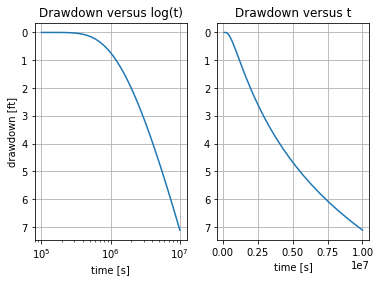

In [57]:
fig = plt.figure()

# Drawdown versus log(t)
ax1 = fig.add_subplot(121)
ax1.set(xlabel='time [s]', ylabel='drawdown [ft]', xscale='log', title='Drawdown versus log(t)')
ax1.invert_yaxis()
ax1.grid(True)
plt.plot(t, s)

# Drawdown versus t
ax2 = fig.add_subplot(122)
ax2.set(xlabel='time [s]', ylabel='', xscale='linear', title='Drawdown versus t')
ax2.invert_yaxis()
ax2.grid(True)
plt.plot(t, s)

plt.show()